In [62]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from DataFrameTransformDoc import DataFrameTransform
from PlotterDoc import Plotter
dataframe = pd.read_csv('loan_payments.csv')

In [63]:
print('Percentages of NULL values in each column:')
dataframe.isnull().sum()/len(dataframe)

Percentages of NULL values in each column:


Unnamed: 0                     0.000000
id                             0.000000
member_id                      0.000000
loan_amount                    0.000000
funded_amount                  0.055448
funded_amount_inv              0.000000
term                           0.087994
int_rate                       0.095314
instalment                     0.000000
grade                          0.000000
sub_grade                      0.000000
employment_length              0.039055
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_date                     0.000000
loan_status                    0.000000
payment_plan                   0.000000
purpose                        0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_credit_line           0.000000
inq_last_6mths                 0.000000
mths_since_last_delinq         0.571666
mths_since_last_record         0.886025


In [64]:
dataframe.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_payment_date', 'mths_since_last_major_derog'], axis= 1, inplace=True)
# Removes unwanted columns from the database

['Unnamed: 0', 'id', 'member_id', 'loan_amount', 'funded_amount_inv', 'term', 'instalment', 'grade', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'issue_date', 'loan_status', 'payment_plan', 'purpose', 'dti', 'delinq_2yrs', 'earliest_credit_line', 'inq_last_6mths', 'open_accounts', 'total_accounts', 'out_prncp', 'out_prncp_inv', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_payment_amount', 'policy_code', 'application_type']


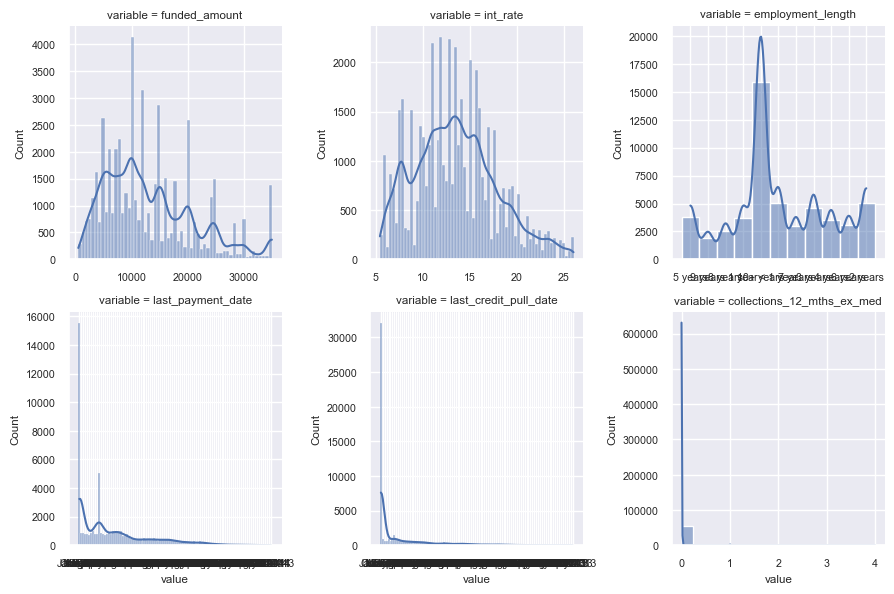

In [65]:
column_name = ['funded_amount',
           'int_rate',
           'employment_length',
           'last_payment_date',
           'last_credit_pull_date',
           'collections_12_mths_ex_med']
categorical_features = [col for col in dataframe.columns if col not in column_name]
sns.set(font_scale=0.7)
f = pd.melt(dataframe, value_vars=column_name)
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex= False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)
print(categorical_features)

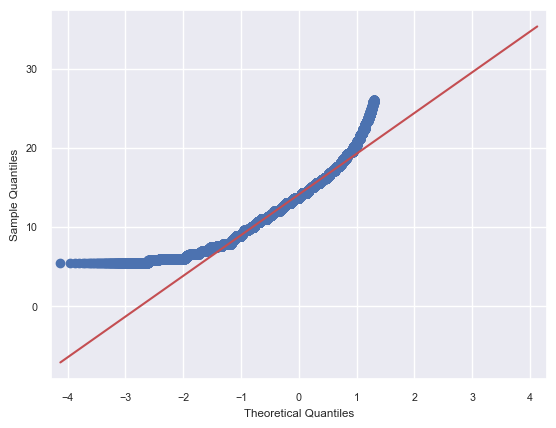

In [66]:
TransformObject = DataFrameTransform(dataframe)
TransformObject.create_qq('int_rate')

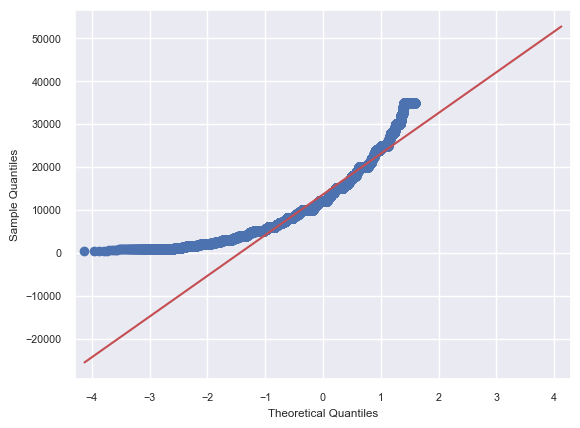

In [67]:
TransformObject = DataFrameTransform(dataframe)
TransformObject.create_qq('funded_amount')

In [68]:
dataframe['funded_amount']=dataframe['funded_amount'].fillna(dataframe['funded_amount'].median)
dataframe['int_rate']=dataframe['int_rate'].fillna(dataframe['int_rate'].median)
dataframe['annual_inc']=dataframe['annual_inc'].fillna(dataframe['annual_inc'].median)

In [69]:
print('Percentages of NULL values in each column:')
dataframe.isnull().sum()/len(dataframe)

Percentages of NULL values in each column:


Unnamed: 0                    0.000000
id                            0.000000
member_id                     0.000000
loan_amount                   0.000000
funded_amount                 0.000000
funded_amount_inv             0.000000
term                          0.087994
int_rate                      0.000000
instalment                    0.000000
grade                         0.000000
sub_grade                     0.000000
employment_length             0.039055
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_date                    0.000000
loan_status                   0.000000
payment_plan                  0.000000
purpose                       0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_credit_line          0.000000
inq_last_6mths                0.000000
open_accounts                 0.000000
total_accounts                0.000000
out_prncp                

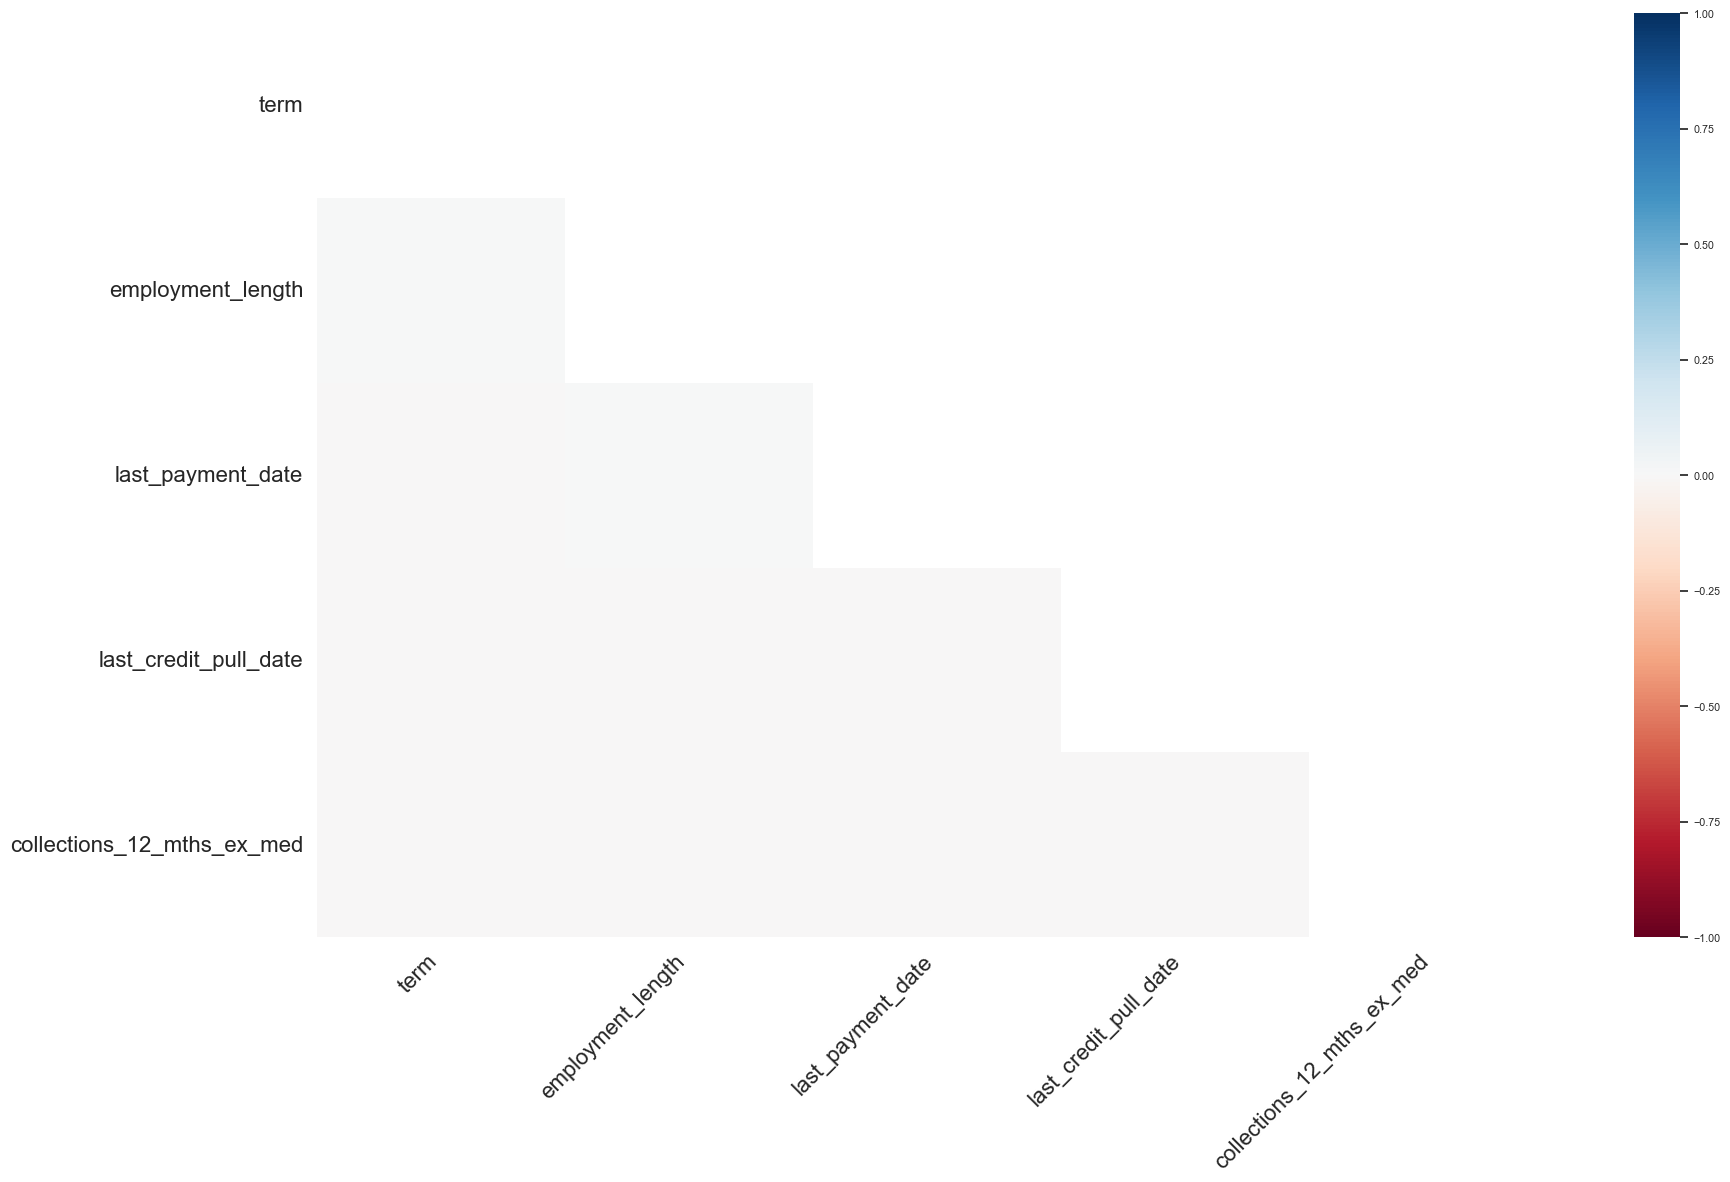

In [70]:
Show_Heatmap = Plotter(dataframe)
Show_Heatmap.create_heatmap()

In [71]:
dataframe.skew(axis=0, numeric_only=True)

Unnamed: 0                     0.000000
id                             2.370336
member_id                      2.205422
loan_amount                    0.805259
funded_amount_inv              0.813927
instalment                     0.996981
annual_inc                     8.711831
dti                            0.189420
delinq_2yrs                    5.370002
inq_last_6mths                 3.248918
open_accounts                  1.059282
total_accounts                 0.779014
out_prncp                      2.356426
out_prncp_inv                  2.356848
total_payment                  1.267891
total_payment_inv              1.256197
total_rec_prncp                1.261015
total_rec_int                  2.204322
total_rec_late_fee            13.184305
recoveries                    14.589793
collection_recovery_fee       27.636843
last_payment_amount            2.499381
collections_12_mths_ex_med    20.252780
policy_code                    0.000000
dtype: float64

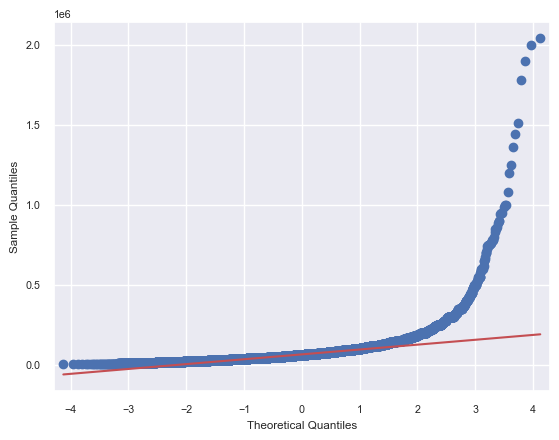

In [72]:
TransformObject = DataFrameTransform(dataframe)
TransformObject.create_qq('annual_inc')

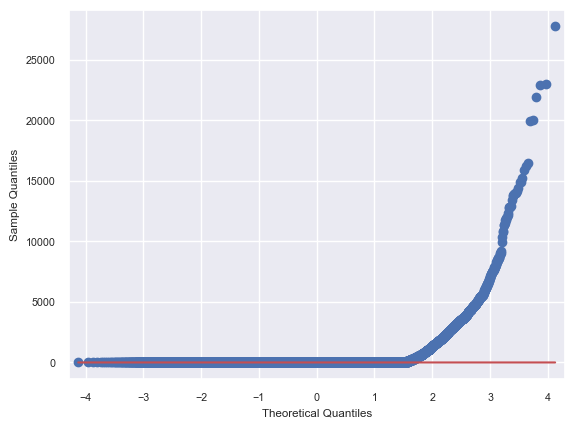

In [73]:
TransformObject = DataFrameTransform(dataframe)
TransformObject.create_qq('recoveries')

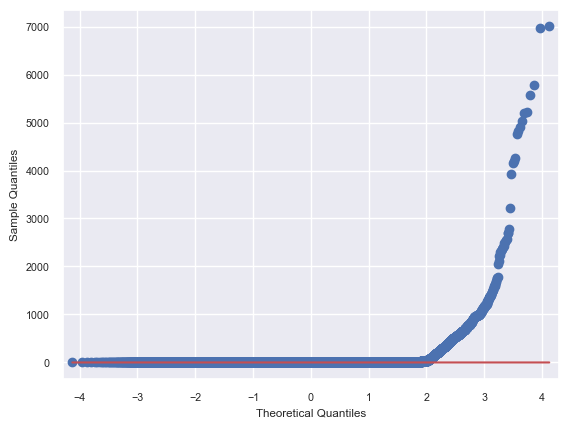

In [74]:
TransformObject = DataFrameTransform(dataframe)
TransformObject.create_qq('collection_recovery_fee')

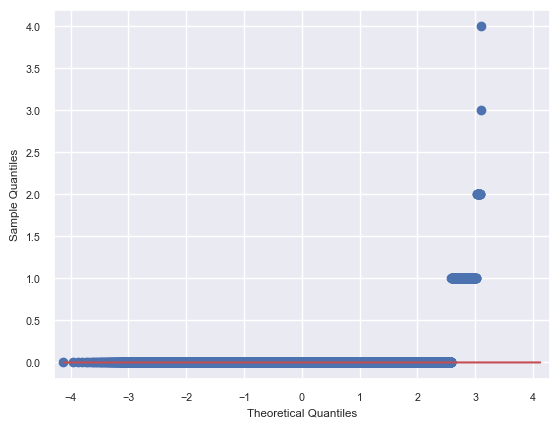

In [75]:
TransformObject = DataFrameTransform(dataframe)
TransformObject.create_qq('collections_12_mths_ex_med')

In [76]:
TransformSkew = DataFrameTransform(dataframe)
TransformSkew.create_skew('annual_inc')

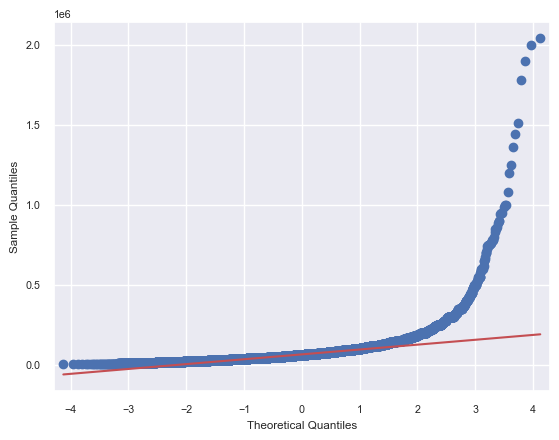

In [77]:
TransformObject = DataFrameTransform(dataframe)
TransformObject.create_qq('annual_inc')

[]

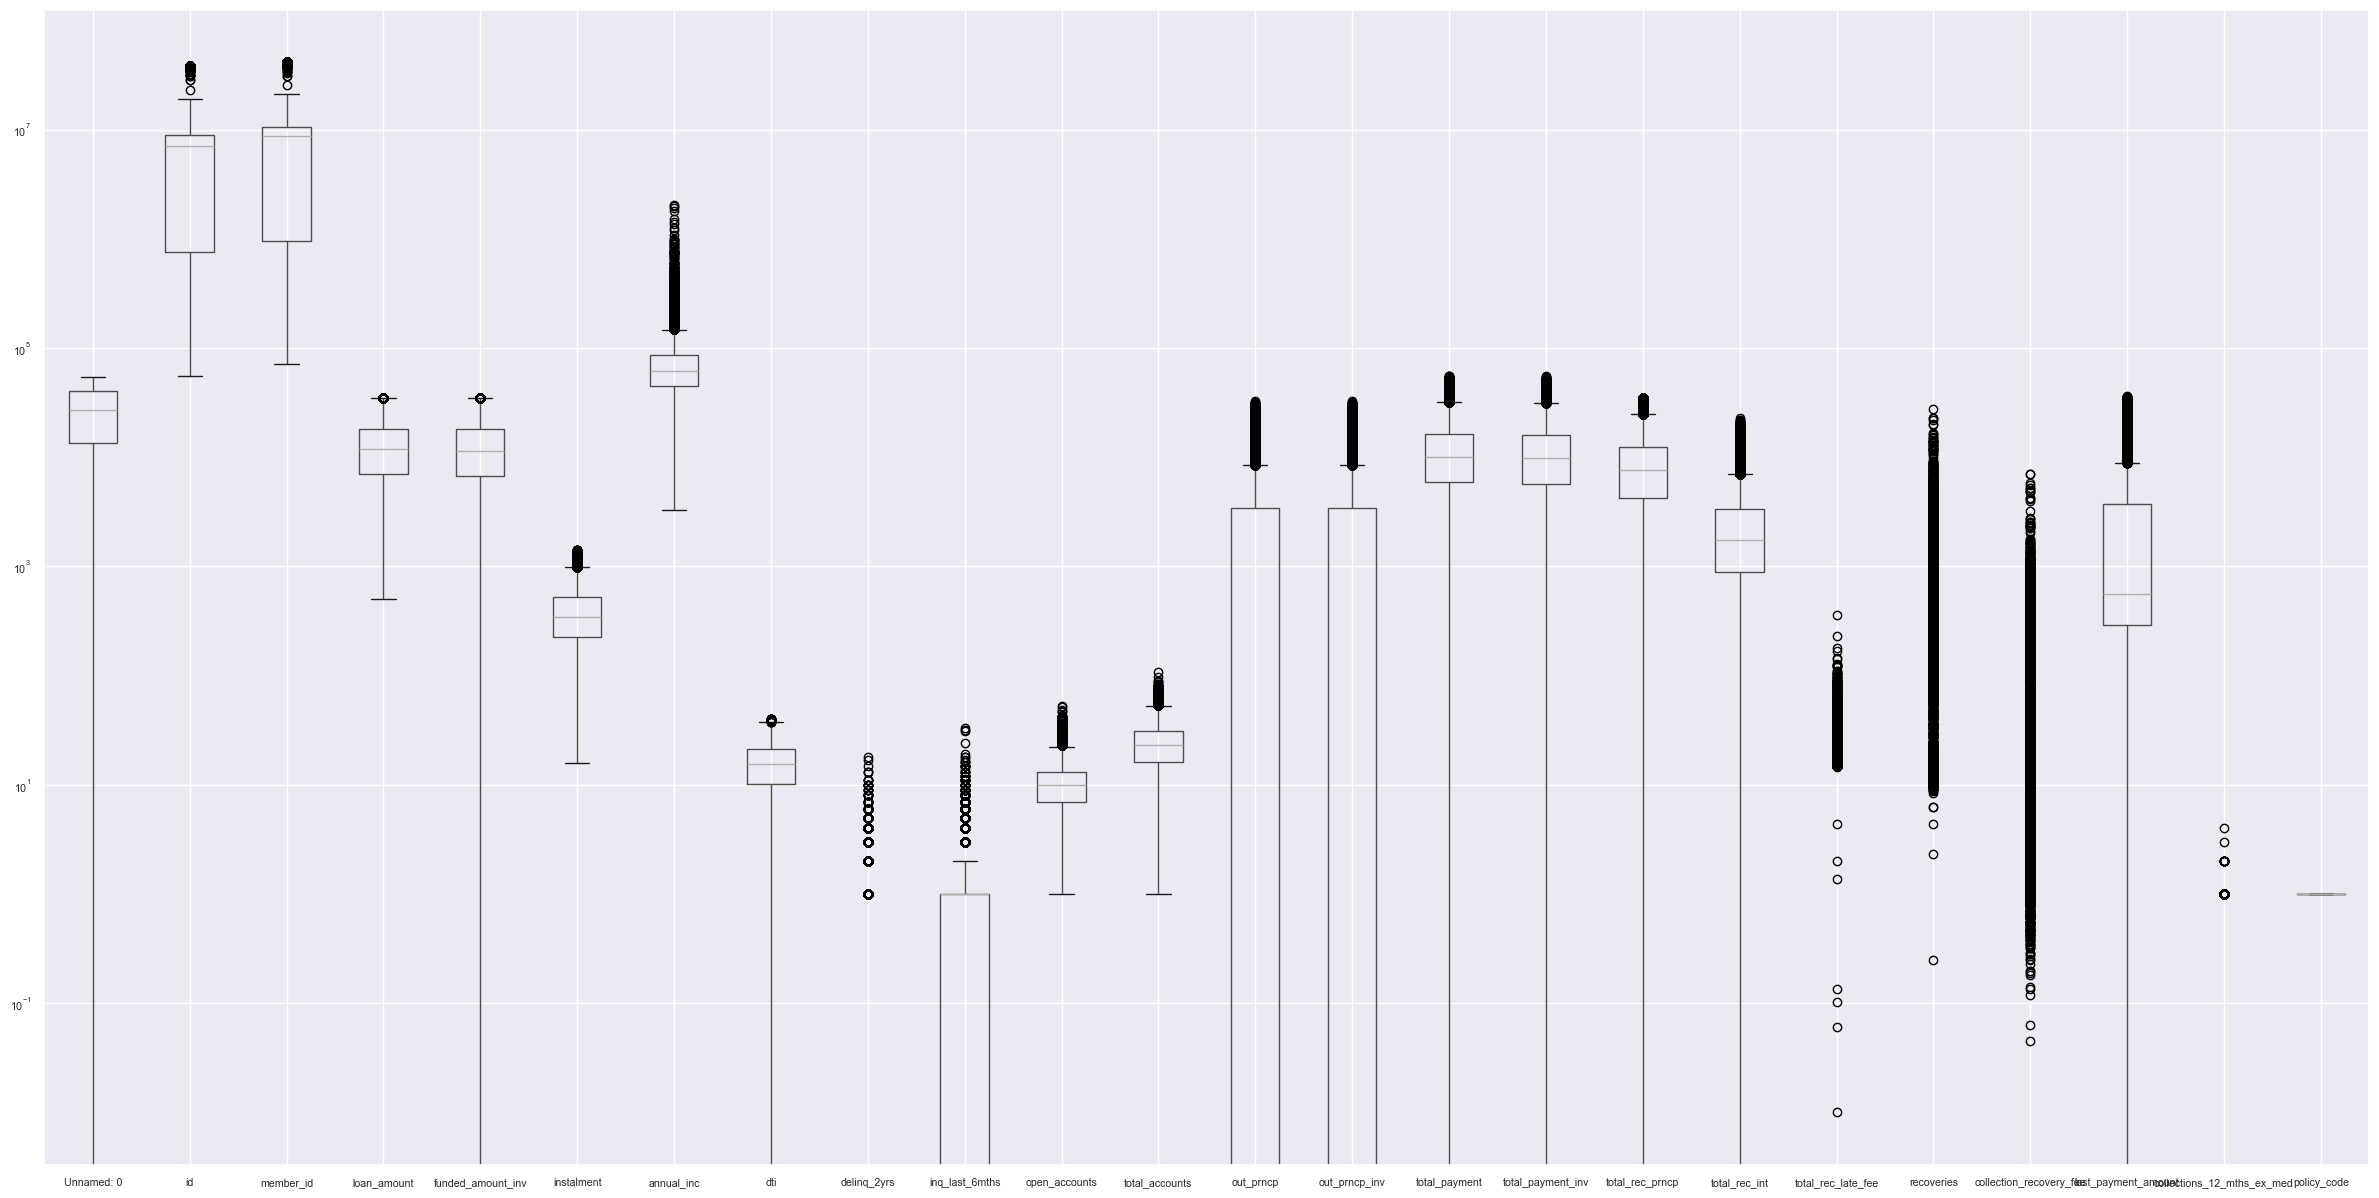

In [78]:
dataframe.boxplot(figsize=(30, 15))
plt.semilogy()

In [79]:
OutlierRemoval = DataFrameTransform(dataframe)
OutlierRemoval.remove_outliers('annual_inc')
OutlierRemoval.remove_outliers('funded_amount_inv')
OutlierRemoval.remove_outliers('out_prncp')
OutlierRemoval.remove_outliers('out_prncp_inv')
OutlierRemoval.remove_outliers('total_payment')
OutlierRemoval.remove_outliers('total_payment_inv')
OutlierRemoval.remove_outliers('total_rec_prncp')
OutlierRemoval.remove_outliers('total_rec_int')

[]

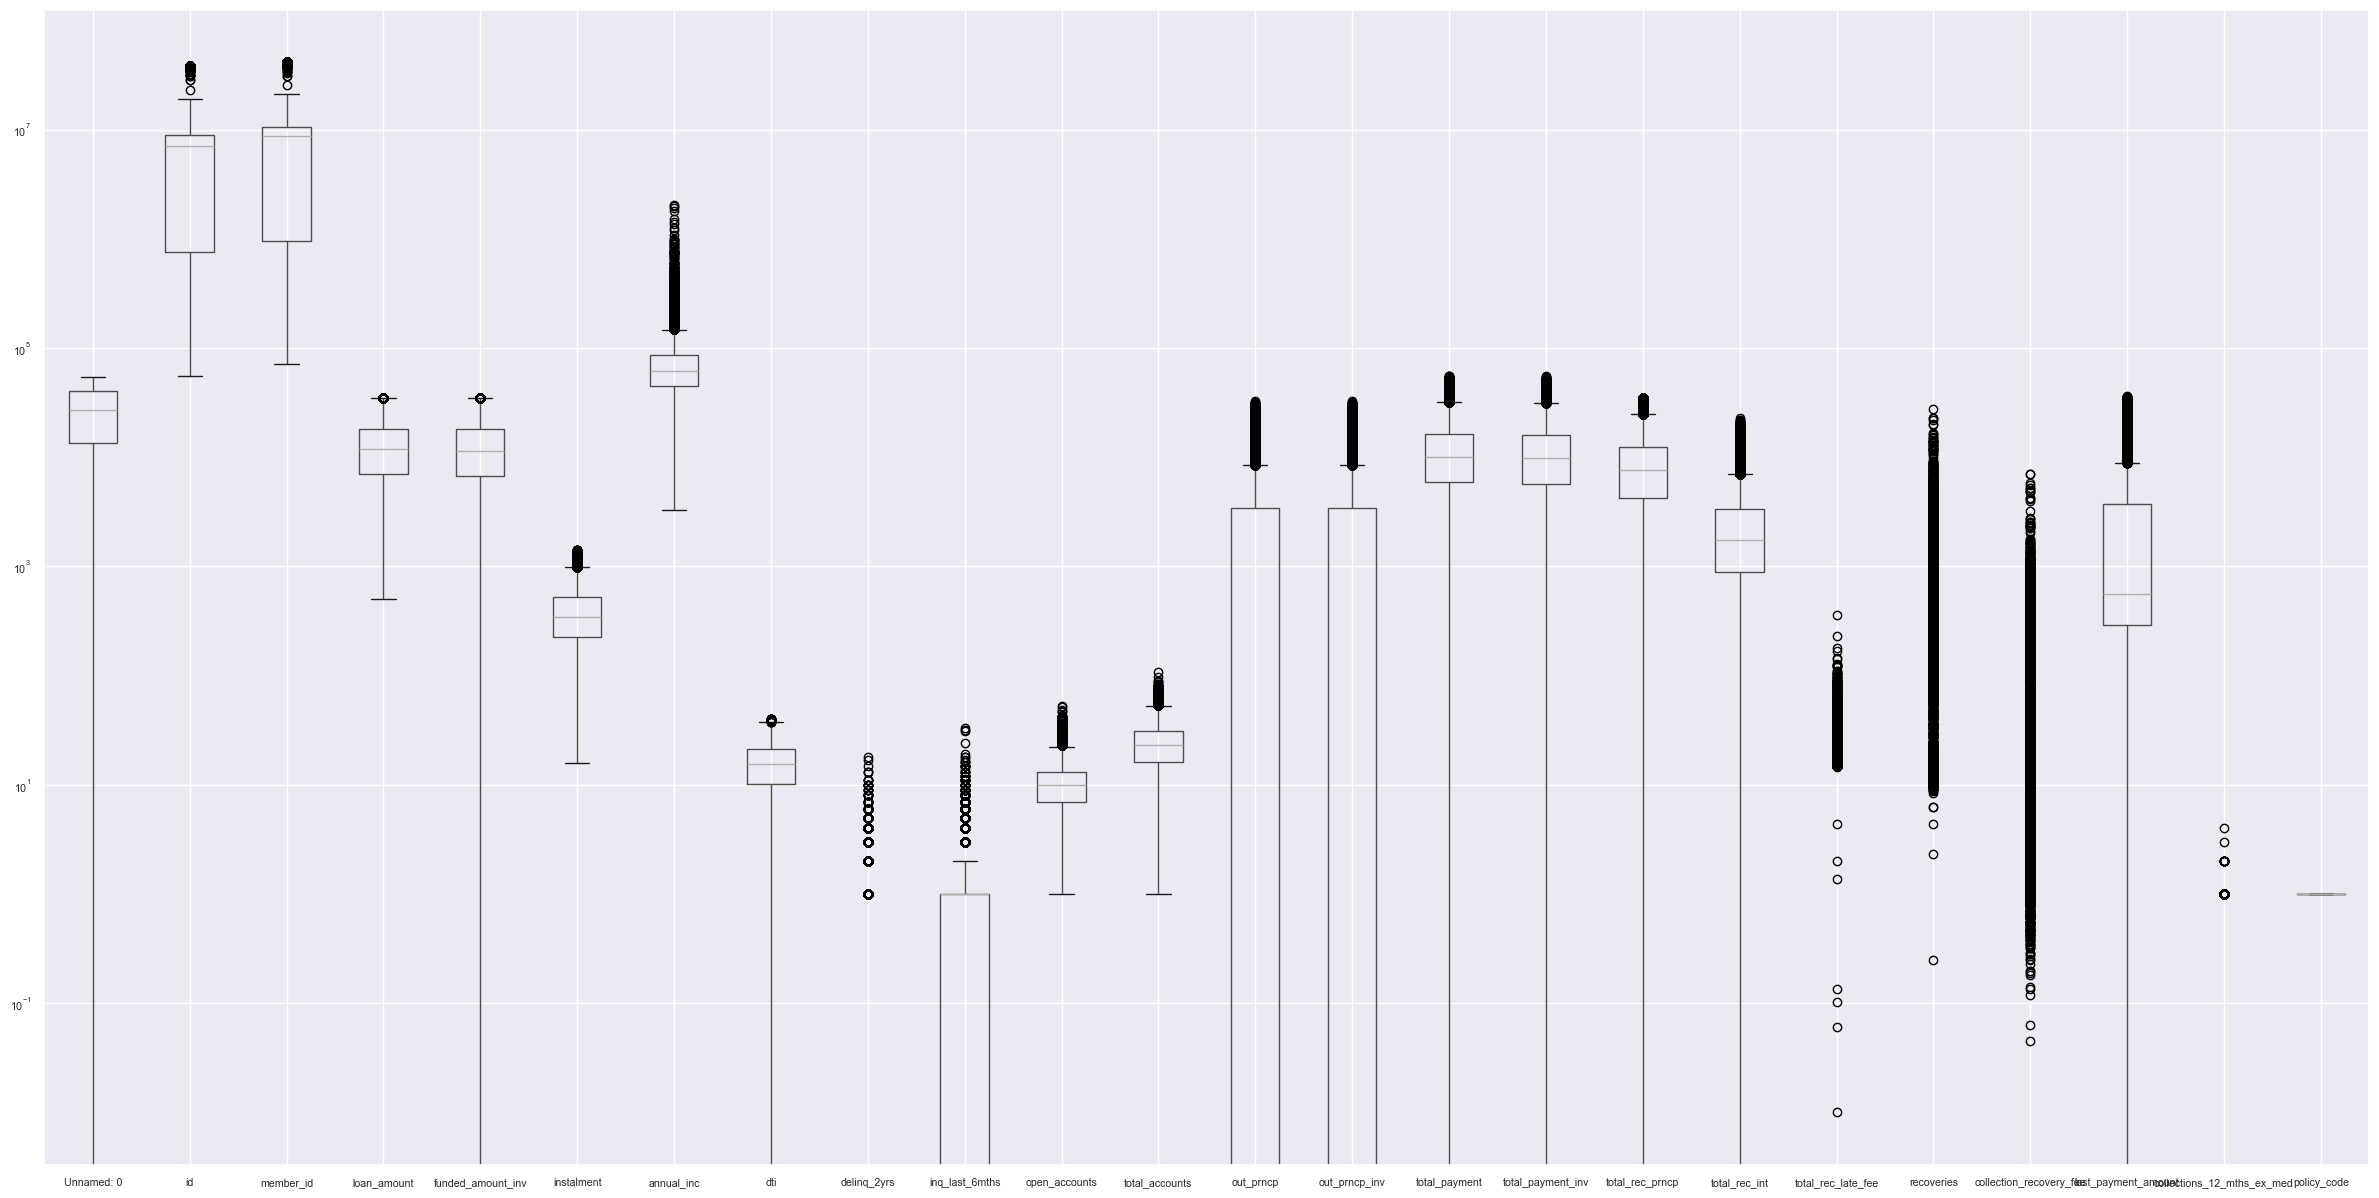

In [80]:
dataframe.boxplot(figsize=(30, 15))
plt.semilogy()

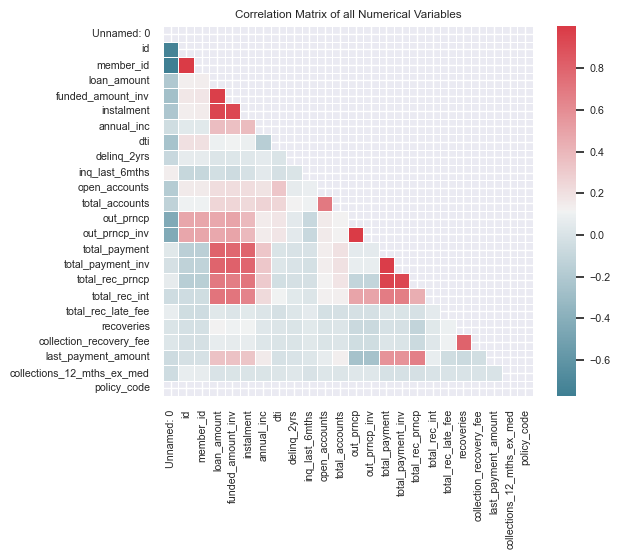

In [81]:
# Creating a correlation matrix

correlation = dataframe.corr(numeric_only=True)
mask = np.zeros_like(correlation, dtype= np.bool_)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, mask=mask, 
            square=True, linewidths=.5, annot=False, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

In [82]:
#Removes highly corrleated columns
dataframe.drop(['loan_amount', 'funded_amount_inv', 'out_prncp_inv', 'total_payment_inv'], axis= 1, inplace=True)